<a href="https://colab.research.google.com/github/jcterrero02/CoderHouse/blob/main/Machine%20Learning%20para%20la%20Ciencia%20de%20Datos/Coder_II_Credit_Card_Elegibility_Julio_Terrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos Paqutes

In [4]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Datos

In [5]:
# Url del dataset hosteado en Github, con informacion sobre aprobaciones de tarjetas de credito
url = 'https://raw.githubusercontent.com/jcterrero02/CoderHouse/main/Fundamentos%20para%20la%20Ciencia%20de%20Datos/data/credit_card_elegibilty.csv'

dataset = pd.read_csv(url, delimiter=',')

# Descripcion de Dataset

Variable	Description
*  **ID**	An identifier for each individual (customer).
* **Gender**	The gender of the individual.
* **Own_car**	A binary feature indicating whether the individual owns a car.
* **Own_property**	A binary feature indicating whether the individual owns a property.
* **Work_phone**	A binary feature indicating whether the individual has a work phone.
* **Phone**	A binary feature indicating whether the individual has a phone.
* **Email**	A binary feature indicating whether the individual has provided an email address.
* **Unemployed**	A binary feature indicating whether the individual is unemployed.
* **Num_children**	The number of children the individual has.
* **Num_family**	The total number of family members.
* **Account_length**	The length of the individual's account with a bank or financial institution.
* **Total_income**	The total income of the individual.
* **Age**	The age of the individual.
* **Years_employed**	The number of years the individual has been employed.
* **Income_type**	The type of income (e.g., employed, self-employed, etc.).
* **Education_type**	The education level of the individual.
* **Family_status**	The family status of the individual.
* **Housing_type**	The type of housing the individual lives in.
* **Occupation_type**	The type of occupation the individual is engaged in.
* **Target**	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

**Preguntas a responder sobre el dataset**
1. Existe una relación entre la edad y la aprobación de una tarjeta de crédito?
2. Los aplicantes con ingresos más altos tienen probabilidad más alta de aprobación de una tarjeta de crédito?
3. La cantidad de dependientes afecta la probabilidad de aprobación de una tarjeta de crédito?
4. Existe una diferencia significativa entre la elegibilidad de la tarjeta dependiendo el género del solicitante?
5. El tipo de trabajo influye en la elegibilidad?

# Analisis Exploratorio

In [6]:
# Visualizacion de las primeras 5 filas del dataset
dataset.head(5)

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.104787               Working   
2  52.321403        8.353354  Commercial associate   
3  61.504343        0.000000             Pensioner   
4  46.193967        2.105450               Working   

                  Education_type         Family_status       Housing_type  \
0               Higher education        Civil marriage   Rented apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education             Separated  House / apartment   
4               Higher education               Married  House / apartment   

  Occupation_type  Target  
0           Other       1  
1  Security staff       0  
2     Sales staff       0  
3           Other       0  
4     Accountants       0

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [8]:
dataset.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

No existen valores nulos dentro del dataset

In [9]:
# Descripcion de Variable Objetivo/Dependiente
dataset['Target'].describe()

count    9709.000000
mean        0.132145
std         0.338666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Target, dtype: float64

In [10]:
dataset['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

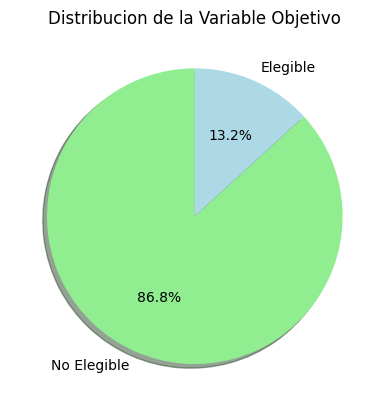

In [11]:
# Conteo de la variable objetivo
target_counts = dataset['Target'].value_counts()

labels = ['No Elegible', 'Elegible']
colors = ['lightgreen', 'lightblue']

plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Distribucion de la Variable Objetivo')
plt.show()


Se evidencia que tenemos un dataset desbalanceado

<Axes: xlabel='Target', ylabel='Total_income'>

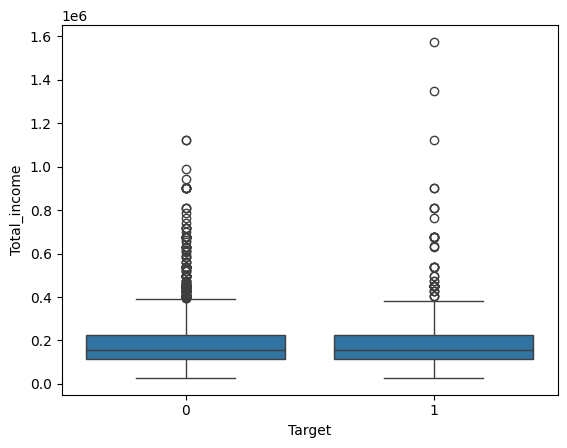

In [12]:
# Veamos la distribucion de los ingresos comparado con la variable objetivo
sns.boxplot(data=dataset, y= 'Total_income', x="Target")


In [13]:
income_pivot = dataset.pivot_table(values='Total_income', index='Target', aggfunc='mean')
print(income_pivot)

         Total_income
Target               
0       180500.539817
1       186007.008963


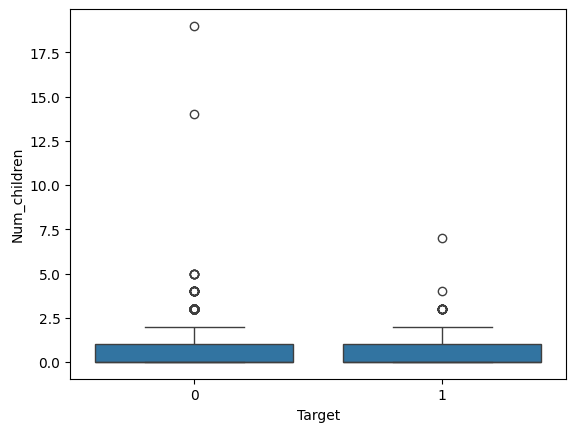

In [14]:
# Verifiquemos si la cantidad de hijos afecta la elegibilidad de la tarjeta de crédito

sns.boxplot(data=dataset, y= 'Num_children', x="Target")
plt.show()

Aparte de algunos valores atipicos no aparenta ver relación negativa entre la cantidad de hijos y la aprobación de la tarjeta de crédito

## Analisis bivariado de los datos

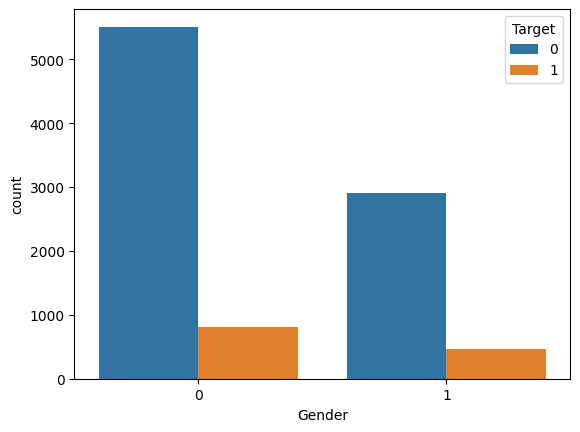

In [15]:
# Verifiquemos si el sexo afecta la variable objetivo
sns.countplot(x = 'Gender', hue = 'Target', data = dataset)
plt.show()


La diferencia entre las personas que reciben una tarjeta y las que no, a nivel de ingresos totales no aparenta ser tan significativa

<Axes: xlabel='Target', ylabel='Age'>

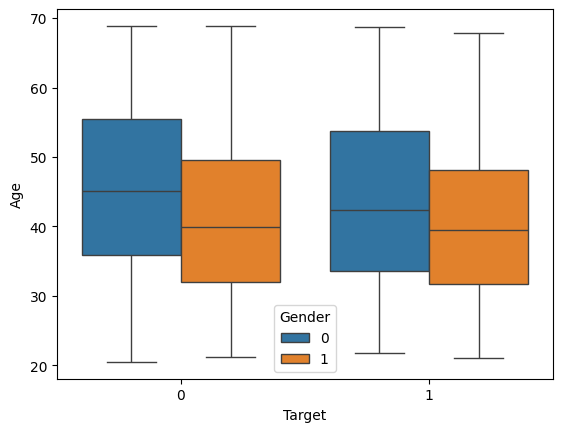

In [16]:
sns.boxplot(x = "Target", y = "Age", hue='Gender', data = dataset)

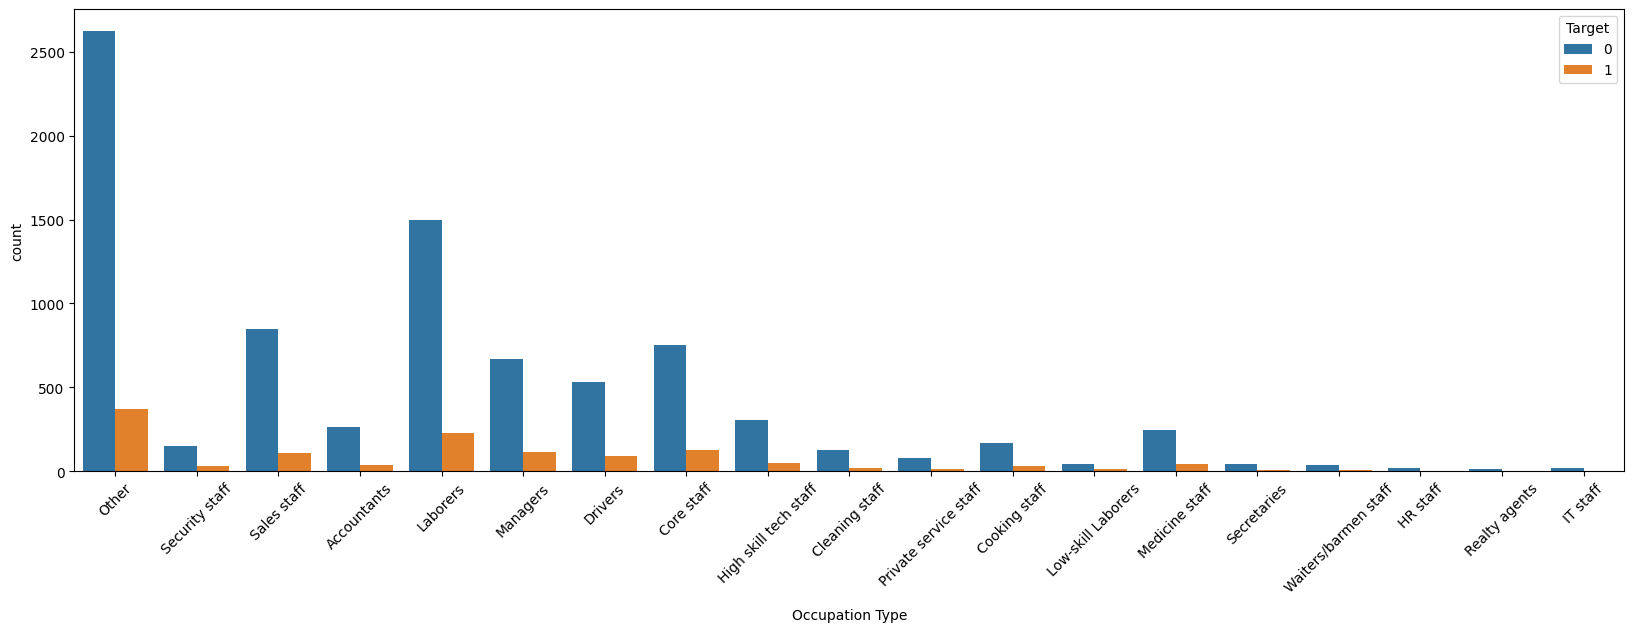

In [17]:
# Analizar si el tipo de ocupación afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = "Occupation_type", hue = "Target", data = dataset)
plt.xlabel("Occupation Type", labelpad=10.0)
plt.xticks(rotation=45)
plt.show()

La ocupación "Laborers" aparenta tener alta incidencia en la no aprobación del crédito

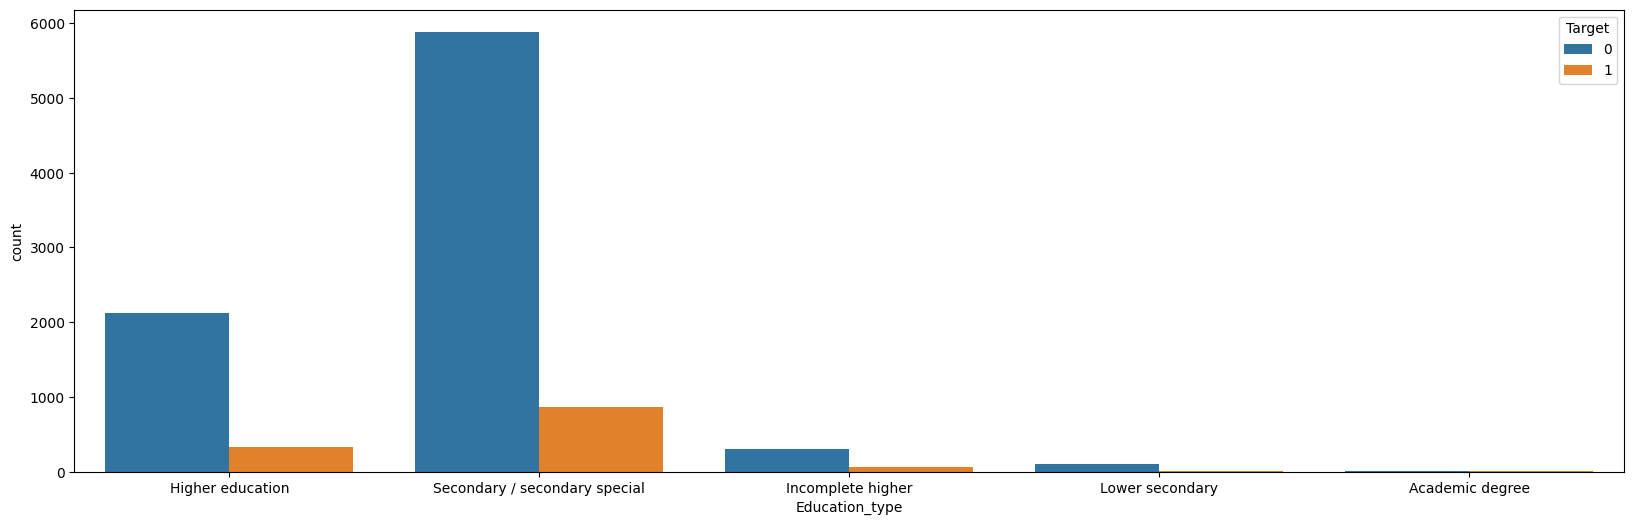

In [18]:
# Verifiquemos si el sexo afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = 'Education_type', hue = 'Target', data = dataset)
plt.show()

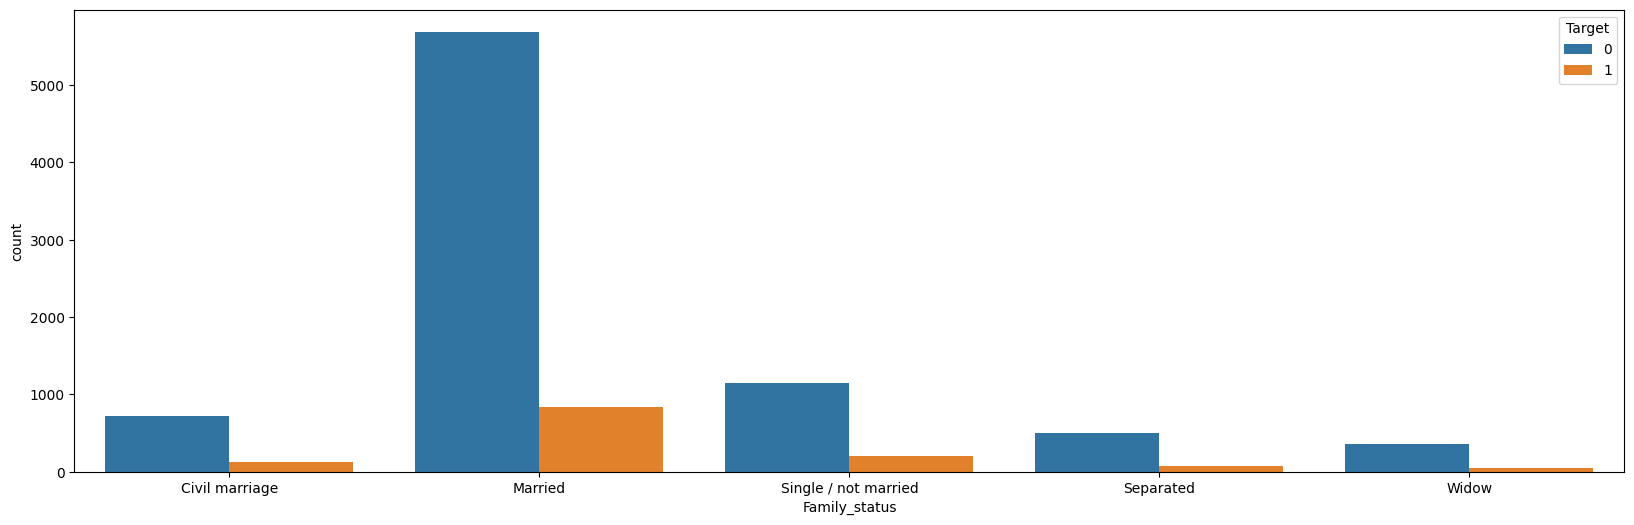

In [19]:
# Verifiquemos si el sexo afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = 'Family_status', hue = 'Target', data = dataset)
plt.show()

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [21]:
dataset.select_dtypes(include=['object'])

Income_type                 Education_type  \
0                  Working               Higher education   
1                  Working  Secondary / secondary special   
2     Commercial associate  Secondary / secondary special   
3                Pensioner               Higher education   
4                  Working               Higher education   
...                    ...                            ...   
9704             Pensioner  Secondary / secondary special   
9705  Commercial associate  Secondary / secondary special   
9706               Working  Secondary / secondary special   
9707             Pensioner               Higher education   
9708               Working  Secondary / secondary special   

             Family_status         Housing_type Occupation_type  
0           Civil marriage     Rented apartment           Other  
1                  Married    House / apartment  Security staff  
2     Single / not married    House / apartment     Sales staff  
3                Separated    House / apartment           Other  
4                  Married    House / apartment     Accountants  
...                    ...                  ...             ...  
9704        Civil marriage  Municipal apartment        Laborers  
9705               Married    House / apartment           Other  
9706               Married    House / apartment           Other  
9707               Married    House / apartment  Medicine staff  
9708  Single / not married     Rented apartment        Laborers  

[9709 rows x 5 columns]

Text(70.7222222222222, 0.5, 'Housing_type')

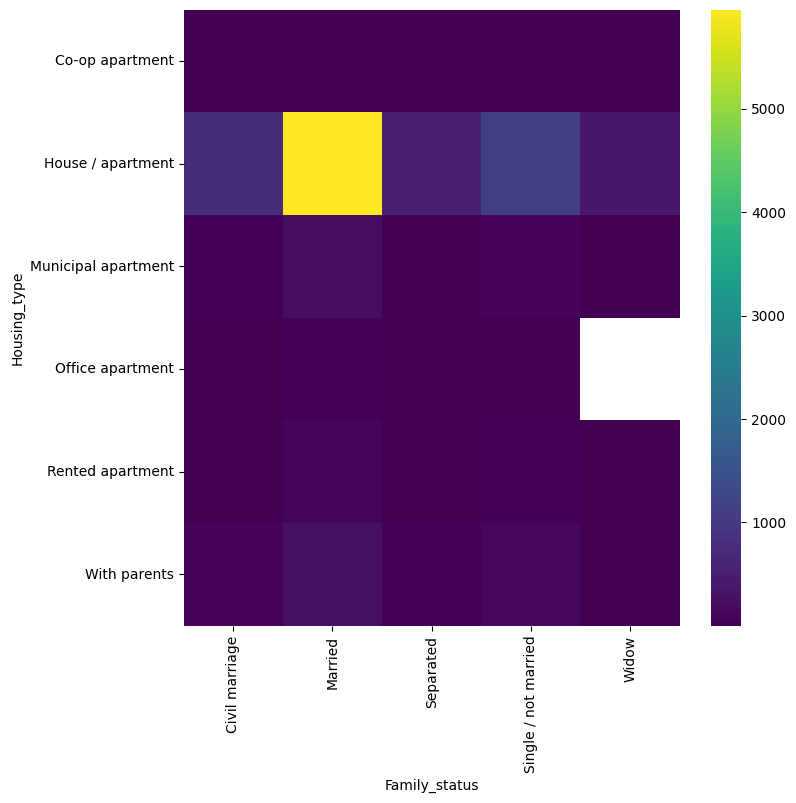

In [22]:
# Analisis bivariado de Family_status y Housing_type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Housing_type'].value_counts()
    for x_label, grp in dataset.groupby('Family_status')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Family_status')
plt.ylabel('Housing_type')

Text(70.7222222222222, 0.5, 'Family_status')

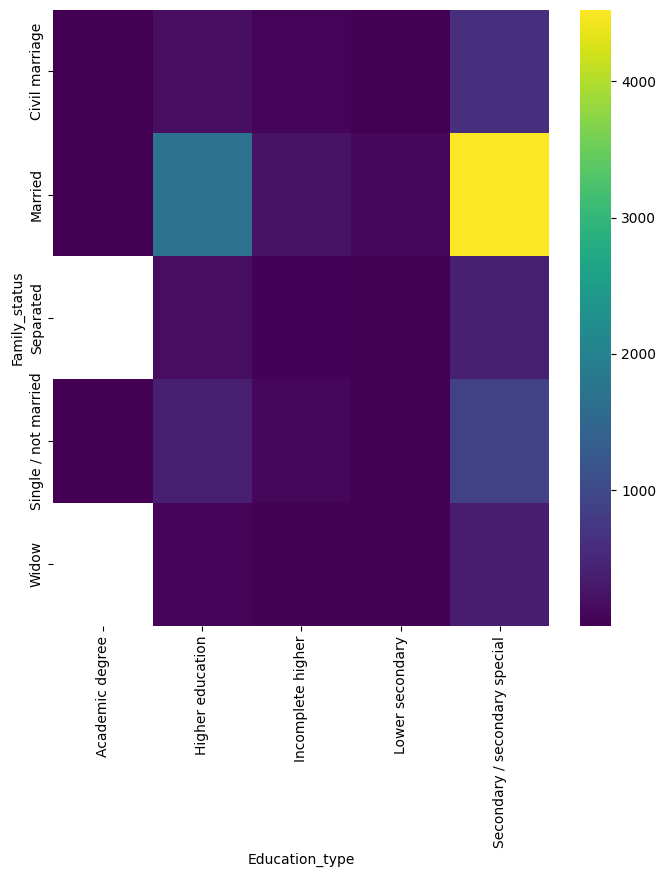

In [23]:
# Analisis bivariado de Family_status y Education_type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Family_status'].value_counts()
    for x_label, grp in dataset.groupby('Education_type')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education_type')
plt.ylabel('Family_status')

Se evidencia que la mayoria de aplicantes estan casados y con una educacion secundaria

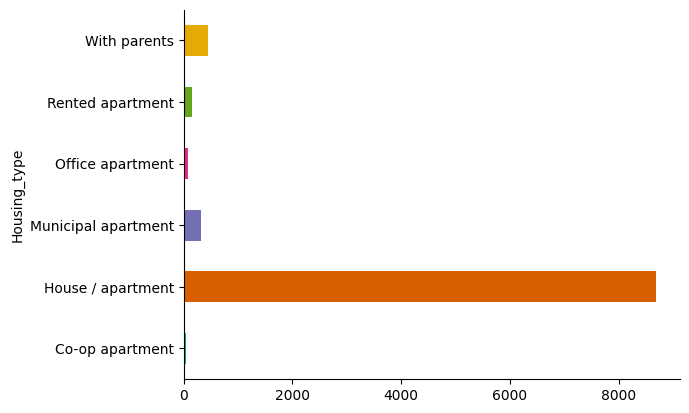

In [24]:
dataset.groupby('Housing_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

la mayoria de los aplicantes estan poseen House / apartment, podemos convertir esta variable en una dummies

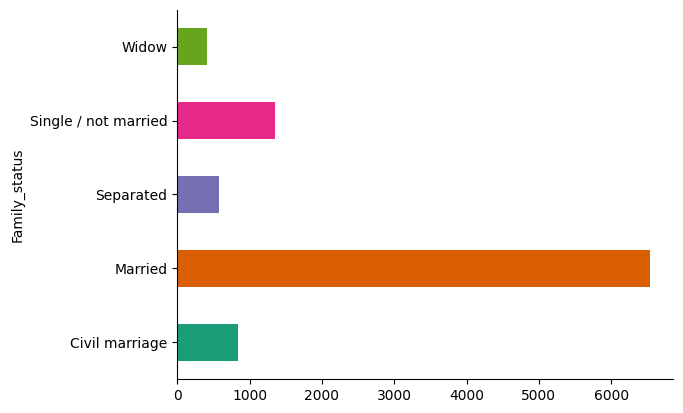

In [25]:
dataset.groupby('Family_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

la mayoria de los aplicantes estan casados, podemos convertir esta variable en una dummies

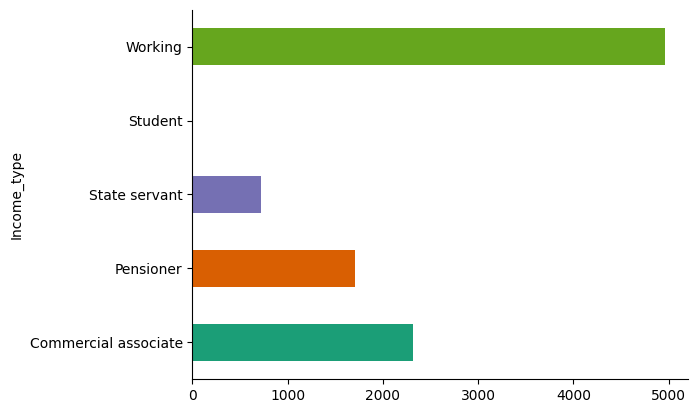

In [26]:
dataset.groupby('Income_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

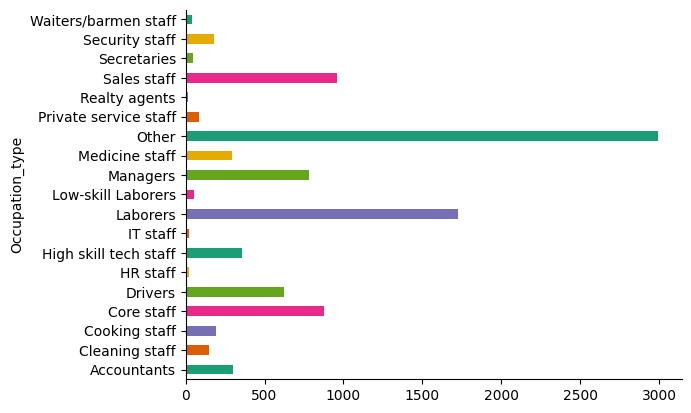

In [27]:
dataset.groupby('Occupation_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

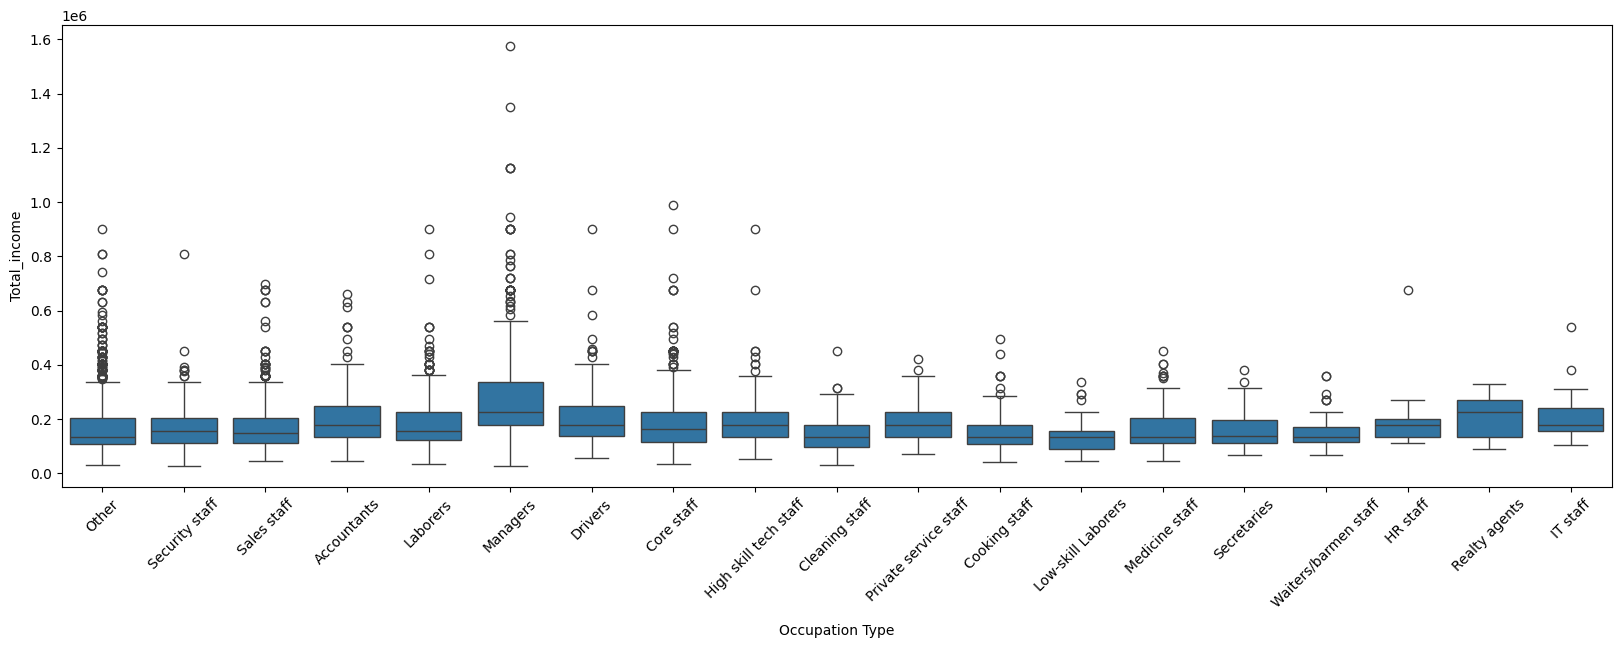

In [28]:
# Verifiquemos los ingresos basados en el tipo de ocupacion
plt.figure(figsize=(20, 6))
sns.boxplot(data=dataset, x= 'Occupation_type', y="Total_income")
plt.xlabel("Occupation Type", labelpad=10.0)
plt.xticks(rotation=45)
plt.show()

## Remover valores atipicos

Creamos una función para remover los valores atipicos

In [29]:
# Esta función calcula los percentiles 75 y 25 para utilizarlos como base en la obtención de los limites inferiores y superiores de cada variable

def remover_outliers(df, columnas):
    for columna in columnas:
      IQR = df[columna].quantile(0.75) - df[columna].quantile(0.25)
      lower_bound = df[columna].quantile(0.25) - 1.5 * IQR
      upper_bound = df[columna].quantile(0.75) + 1.5 * IQR
      df = df[((df[columna] >= lower_bound) & (df[columna] <= upper_bound))]

    return df

In [30]:
# Aplicamos la función creada para remover los outliers o valores atipicos del dataset

columnas_numericas = ['Age', 'Num_children', 'Num_family', 'Total_income', 'Account_length', 'Years_employed']

dataset_ = remover_outliers(dataset, columnas_numericas)


In [31]:
dataset_.describe()

ID       Gender      Own_car  Own_property   Work_phone  \
count  8.792000e+03  8792.000000  8792.000000   8792.000000  8792.000000   
mean   5.076238e+06     0.349864     0.361351      0.669927     0.213148   
std    4.086447e+04     0.476954     0.480419      0.470266     0.409555   
min    5.008806e+06     0.000000     0.000000      0.000000     0.000000   
25%    5.036987e+06     0.000000     0.000000      0.000000     0.000000   
50%    5.069478e+06     0.000000     0.000000      1.000000     0.000000   
75%    5.113015e+06     1.000000     1.000000      1.000000     0.000000   
max    5.150479e+06     1.000000     1.000000      1.000000     1.000000   

             Phone        Email  Unemployed  Num_children   Num_family  \
count  8792.000000  8792.000000  8792.00000   8792.000000  8792.000000   
mean      0.282188     0.086556     0.18949      0.380346     2.136374   
std       0.450090     0.281199     0.39192      0.646836     0.835557   
min       0.000000     0.000000     0.00000      0.000000     1.000000   
25%       0.000000     0.000000     0.00000      0.000000     2.000000   
50%       0.000000     0.000000     0.00000      0.000000     2.000000   
75%       1.000000     0.000000     0.00000      1.000000     3.000000   
max       1.000000     1.000000     1.00000      2.000000     4.000000   

       Account_length   Total_income          Age  Years_employed       Target  
count     8792.000000    8792.000000  8792.000000     8792.000000  8792.000000  
mean        27.122611  169528.038842    43.532682        4.607022     0.132507  
std         16.635171   72332.236385    11.848597        4.530469     0.339060  
min          0.000000   27000.000000    20.504186        0.000000     0.000000  
25%         13.000000  112500.000000    33.555104        0.741288     0.000000  
50%         26.000000  157500.000000    42.228109        3.367626     0.000000  
75%         41.000000  216000.000000    53.641074        7.179477     0.000000  
max         60.000000  391500.000000    68.863837       19.025716     1.000000

In [32]:
dataset_.head(5)

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   
5  5008819       1        1             1           0      0      0   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   
5           0             0           2              17      135000.0   

         Age  Years_employed           Income_type  \
1  58.793815        3.104787               Working   
2  52.321403        8.353354  Commercial associate   
3  61.504343        0.000000             Pensioner   
4  46.193967        2.105450               Working   
5  48.674511        3.269061  Commercial associate   

                  Education_type         Family_status       Housing_type  \
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education             Separated  House / apartment   
4               Higher education               Married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

  Occupation_type  Target  
1  Security staff       0  
2     Sales staff       0  
3           Other       0  
4     Accountants       0  
5        Laborers       0

Correlación de las variables

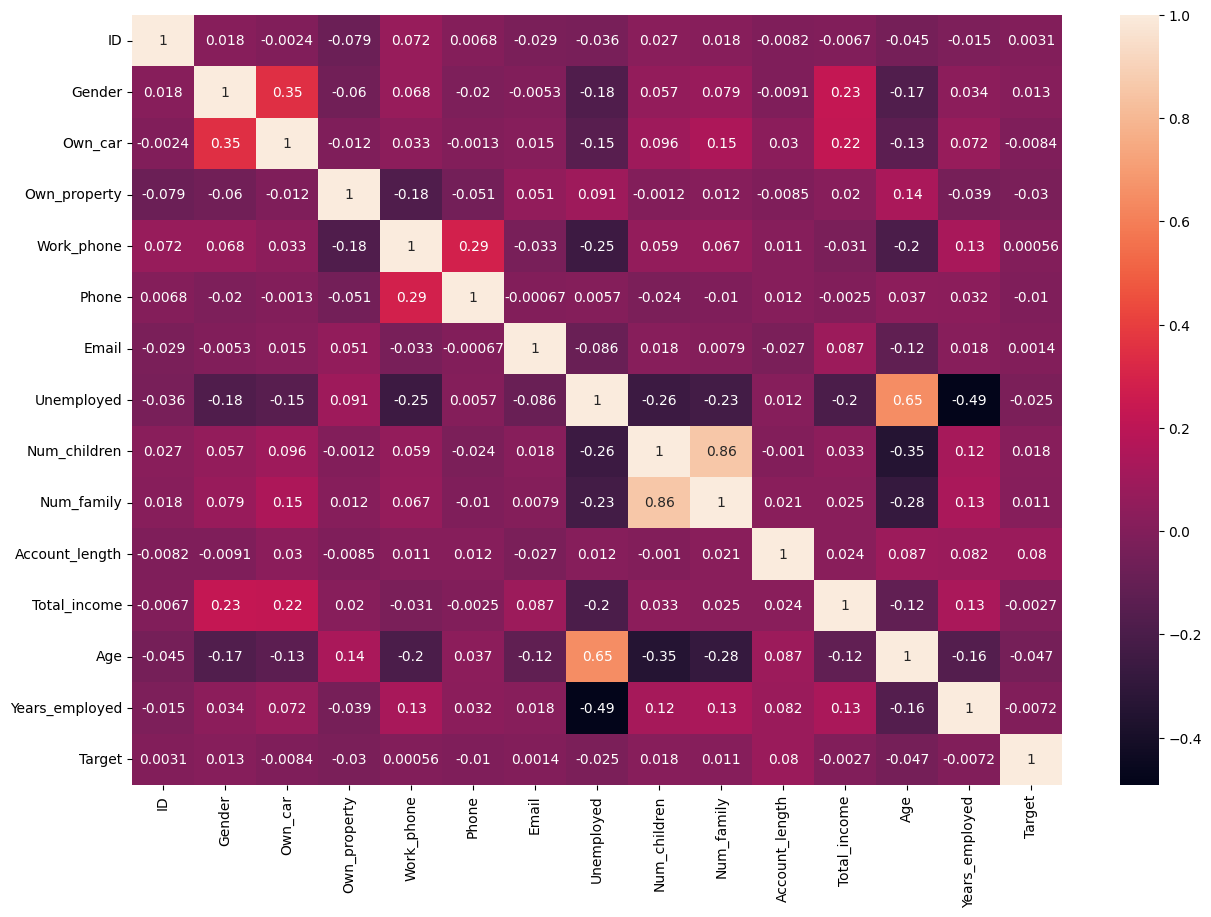

In [33]:
# Para poder predecir debemos evaluar la correlación, entre variables predictoras y entre variables predictoras con la variable objetivo
plt.figure(figsize = (15, 10))

correlation_matrix = dataset_.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Insigths


Resultados del analisis de correlación


*  Las variables Num_family and Num_children poseen alta correlacion positiva, podemos eliminar la variable Num_family ya que posee una correlacion mas baja con la variable objetivo
*   Las variables Gender y Own_car poseen una correlación alta con respecto a las demas variables, tomando en cuenta que la variable Own_car posee una correlación negativa con la variable objetivo podemos disponer de ella
*   Las variables Unemployed y Years_employed poseen alta correlacion negativa, tomando en cuenta que la variable Unemployed tambien posee alta correlacion positiva con Age, podemos eliminar la variable Unemployed



**Respuestas a preguntas:**

1.   La edad, el tamaño de la familia, el genero, el tipo de trabajo y los ingresos totales de los aplicantes no aparentan ser factores determinantes fuertes para la aprobación de las tarjetas de credito

